In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv("listing_review_cleaned_500_with_feature_names.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'listing_review_cleaned_500_with_feature_names.csv'

In [3]:
empty_cols = df.columns[df.isna().any()].tolist()
empty_cols

[]

# Normalizing

In [4]:
df.drop(["Unnamed: 0","Unnamed: 0.1","listing_id","room_type"],axis=1,inplace=True)
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price_x,minimum_nights,maximum_nights,...,without,wonderful,work,worth,would,yet,negative_score,positive_score,neutral_score,compound_score
0,1.00,0.99,1,2,2,1.0,2.0,70.0,3,1125,...,0.002285,0.033321,0.006870,0.001969,0.035920,0.002068,0.009267,0.339740,0.650990,0.877849
1,1.00,0.99,1,2,2,1.0,1.0,67.0,3,21,...,0.004934,0.030172,0.002867,0.001443,0.029913,0.001348,0.008484,0.368911,0.622589,0.892961
2,1.00,0.95,0,4,1,1.0,1.0,45.0,2,21,...,0.002719,0.017128,0.004002,0.000523,0.029593,0.000596,0.011114,0.338574,0.650303,0.791356
3,0.92,0.87,1,2,6,2.0,4.0,80.0,1,12,...,0.006063,0.015999,0.002672,0.002716,0.027782,0.001912,0.013310,0.372166,0.614529,0.856854
4,1.00,0.91,0,5,5,1.0,3.0,251.0,3,365,...,0.004330,0.019555,0.012654,0.005835,0.039574,0.004449,0.014190,0.265179,0.720702,0.758196


In [5]:
from sklearn.preprocessing import MinMaxScaler
norm_model = MinMaxScaler()
norm_model.fit(df)
norm = norm_model.fit_transform(df)

In [6]:
norm_df = pd.DataFrame(norm,columns = df.columns)
norm_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,accommodates,bedrooms,beds,price_x,minimum_nights,maximum_nights,...,without,wonderful,work,worth,would,yet,negative_score,positive_score,neutral_score,compound_score
0,1.00,0.99,1.0,0.000302,0.066667,0.000000,0.058824,0.006707,0.002503,1.000000,...,0.007630,0.033321,0.018880,0.002385,0.081698,0.004432,0.025982,0.339740,0.650990,0.941166
1,1.00,0.99,1.0,0.000302,0.066667,0.000000,0.000000,0.006372,0.002503,0.017794,...,0.016473,0.030172,0.007878,0.001747,0.068036,0.002889,0.023788,0.368911,0.622589,0.948840
2,1.00,0.95,0.0,0.000906,0.000000,0.000000,0.000000,0.003912,0.001252,0.017794,...,0.009079,0.017128,0.010999,0.000634,0.067309,0.001277,0.031160,0.338574,0.650303,0.897240
3,0.92,0.87,1.0,0.000302,0.333333,0.083333,0.176471,0.007825,0.000000,0.009786,...,0.020243,0.015999,0.007342,0.003290,0.063188,0.004098,0.037317,0.372166,0.614529,0.930503
4,1.00,0.91,0.0,0.001208,0.266667,0.000000,0.117647,0.026939,0.002503,0.323843,...,0.014456,0.019555,0.034774,0.007068,0.090010,0.009534,0.039786,0.265179,0.720702,0.880400


In [7]:
y_target_rating = norm_df.iloc[:,[18]].values
y_target_accuracy = norm_df.iloc[:,19].values
y_target_cleanliness = norm_df.iloc[:,20].values
y_target_checkin = norm_df.iloc[:,21].values
y_target_communication = norm_df.iloc[:,22].values
y_target_location = norm_df.iloc[:,23].values
y_target_values = norm_df.iloc[:,[24]].values
X = norm_df.iloc[:, np.r_[0:17, 25:613]].values

In [8]:
y_target_rating

array([[0.956],
       [0.958],
       [0.948],
       ...,
       [0.972],
       [0.954],
       [0.978]])

In [9]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LassoCV,Lasso, Ridge,LinearRegression
# from sklearn.metrics import mean_squared_error
# C = [0.001,0.01,0.1,1,10,100,500,1000]
# n_fold = KFold(n_splits=10)


In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_test,y_train, y_test = train_test_split(X,y_target,test_size=0.2,shuffle=True)

In [11]:
# model = Lasso()
# model.fit(X_train,y_train)
# predict = model.predict(X_test)
# print(mean_squared_error(y_test,predict))

In [70]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV,Lasso, Ridge,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
C = [0.01,0.1,1,10,100,500,1000,5000,10000,50000,100000]
C = np.arange(0.01,1000,20)

n_fold = KFold(n_splits=5)
print(C)

[400]


# Model for overall rating

In [71]:
mean_error=[]
abs_error = []
std_error=[]
for c in C:
    model = Lasso(alpha=1/(2*c))
#     model = LinearRegression()
    mse_arr = []
    mae_arr = []
    for train,test in n_fold.split(X):
        l_model = model.fit(X[train],y_target_rating[train])
        y_predict = model.predict(X[test])
#         print("MSE",mean_squared_error(y_target[test],y_predict))
        mse_arr.append(mean_squared_error(y_target_rating[test],y_predict))
        mae_arr.append(mean_absolute_error(y_target_rating[test],y_predict))
    mean_error.append(np.array(mse_arr).mean())
    std_error.append(np.array(mse_arr).std())
    abs_error.append(np.array(mae_arr).mean())
        

In [72]:
print(mean_error, abs_error)

[0.010083585250067353] [0.05407394763317887]


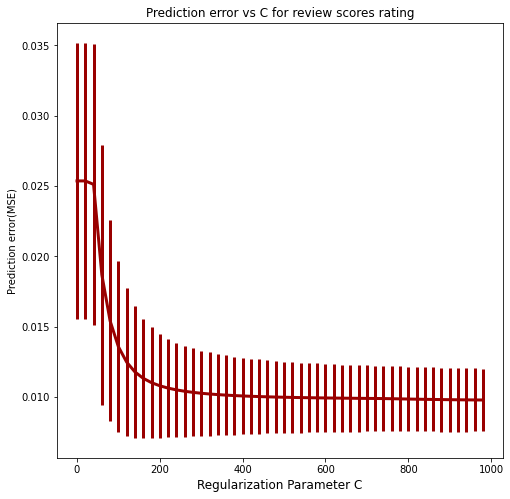

In [36]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(C, mean_error, yerr=std_error,lw=3,color='#990000')
plt.xlabel("Regularization Parameter C",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs C for review scores rating")
plt.show()

In [35]:
columns = (norm_df.iloc[:, np.r_[0:17, 25:613]].columns)
coef_weight = {}
for i in range(0,len(columns)):
    coef_weight[columns[i]] = l_model.coef_[i]
coef_weight

{'host_response_rate': -0.0,
 'host_acceptance_rate': -0.0,
 'host_is_superhost': 0.0,
 'host_total_listings_count': 0.0,
 'accommodates': 0.0,
 'bedrooms': 0.0,
 'beds': 0.0,
 'price_x': 0.0,
 'minimum_nights': 0.0,
 'maximum_nights': -0.004244448981714216,
 'minimum_nights_avg_ntm': 0.0,
 'maximum_nights_avg_ntm': -0.0,
 'has_availability': 0.0,
 'availability_30': -0.0,
 'availability_60': -0.0,
 'availability_90': -0.0,
 'availability_365': 0.0,
 'instant_bookable': -0.0001426372532038776,
 'calculated_host_listings_count': 0.0,
 'calculated_host_listings_count_entire_homes': 0.0,
 'calculated_host_listings_count_private_rooms': 0.0,
 'calculated_host_listings_count_shared_rooms': -0.0,
 'reviews_per_month': 0.0,
 'host_since_days': -0.0036433304936895556,
 'a few days or more': 0.0,
 'within a day': -0.003770922818818194,
 'within a few hours': -0.0,
 'within an hour': 0.0,
 'Dn Laoghaire-Rathdown': 0.0,
 'Dublin City': -0.0018689971185913634,
 'Fingal': 0.0,
 'South Dublin': 0.0,

# Model for accuracy

In [64]:
mean_error_accuracy=[]
std_error_accuracy=[]
for c in C:
    model = Lasso(alpha=1/(2*c))
#     model = LinearRegression()
    mse_arr = []
    for train,test in n_fold.split(X):
        l_model = model.fit(X[train],y_target_accuracy[train])
        y_predict = model.predict(X[test])
#         print("MSE",mean_squared_error(y_target[test],y_predict))
        mse_arr.append(mean_squared_error(y_target_accuracy[test],y_predict))
    mean_error_accuracy.append(np.array(mse_arr).mean())
    std_error_accuracy.append(np.array(mse_arr).std())
        

In [65]:
mean_error_accuracy

[0.004820609611769813]

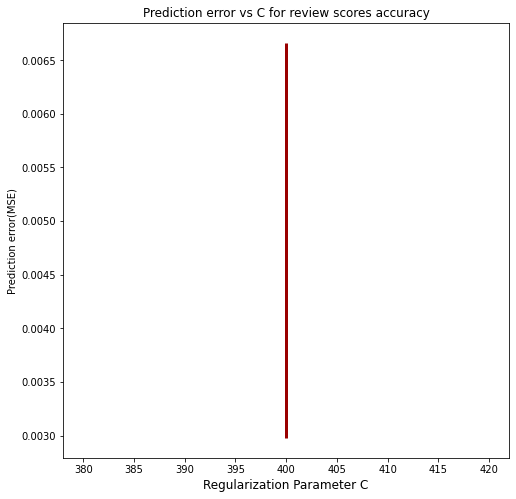

In [66]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(C, mean_error_accuracy, yerr=std_error_accuracy,lw=3,color='#990000')
plt.xlabel("Regularization Parameter C",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs C for review scores accuracy")
plt.show()

# Model for cleanliness

In [67]:
mean_error_cleanliness=[]
std_error_cleanliness=[]
for c in C:
    model = Lasso(alpha=1/(2*c))
#     model = LinearRegression()
    mse_arr = []
    for train,test in n_fold.split(X):
        l_model = model.fit(X[train],y_target_cleanliness[train])
        y_predict = model.predict(X[test])
#         print("MSE",mean_squared_error(y_target[test],y_predict))
        mse_arr.append(mean_squared_error(y_target_cleanliness[test],y_predict))
    mean_error_cleanliness.append(np.array(mse_arr).mean())
    std_error_cleanliness.append(np.array(mse_arr).std())
        

In [68]:
mean_error_cleanliness

[0.008871096711881198]

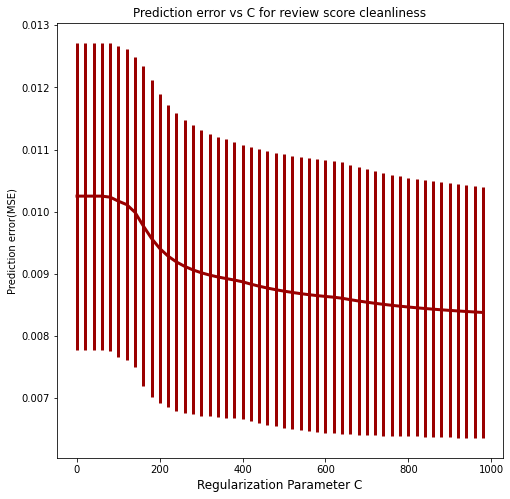

In [43]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(C, mean_error_cleanliness, yerr=std_error_cleanliness,lw=3,color='#990000')
plt.xlabel("Regularization Parameter C",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs C for review score cleanliness")
plt.show()

# Model for checkin

In [73]:
mean_error_checkin=[]
std_error_checkin=[]
for c in C:
    model = Lasso(alpha=1/(2*c))
#     model = LinearRegression()
    mse_arr = []
    for train,test in n_fold.split(X):
        l_model = model.fit(X[train],y_target_checkin[train])
        y_predict = model.predict(X[test])
#         print("MSE",mean_squared_error(y_target[test],y_predict))
        mse_arr.append(mean_squared_error(y_target_checkin[test],y_predict))
    mean_error_checkin.append(np.array(mse_arr).mean())
    std_error_checkin.append(np.array(mse_arr).std())
        

In [74]:
mean_error_checkin

[0.004100514654482122]

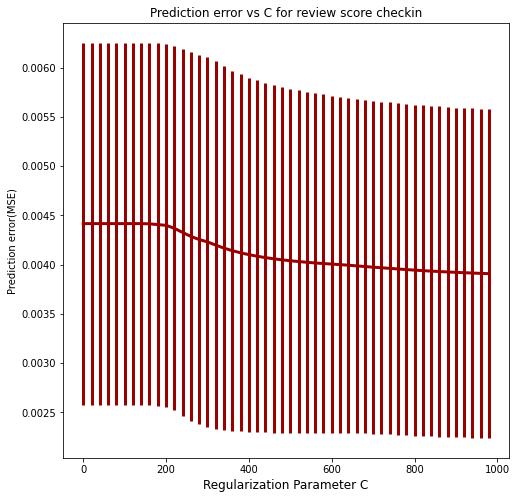

In [46]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(C, mean_error_checkin, yerr=std_error_checkin,lw=3,color='#990000')
plt.xlabel("Regularization Parameter C",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs C for review score checkin")
plt.show()

# Model for communication

In [75]:
mean_error_communication=[]
std_error_communication=[]
for c in C:
    model = Lasso(alpha=1/(2*c))
#     model = LinearRegression()
    mse_arr = []
    for train,test in n_fold.split(X):
        l_model = model.fit(X[train],y_target_communication[train])
        y_predict = model.predict(X[test])
#         print("MSE",mean_squared_error(y_target[test],y_predict))
        mse_arr.append(mean_squared_error(y_target_communication[test],y_predict))
    mean_error_communication.append(np.array(mse_arr).mean())
    std_error_communication.append(np.array(mse_arr).std())
        

In [76]:
mean_error_communication

[0.003539682978095691]

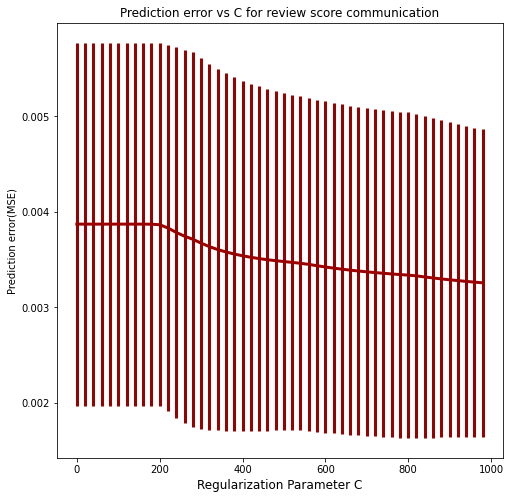

In [49]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(C, mean_error_communication, yerr=std_error_communication,lw=3,color='#990000')
plt.xlabel("Regularization Parameter C",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs C for review score communication")
plt.show()

# Model for location

In [77]:
mean_error_location=[]
std_error_location=[]
for c in C:
    model = Lasso(alpha=1/(2*c))
#     model = LinearRegression()
    mse_arr = []
    for train,test in n_fold.split(X):
        l_model = model.fit(X[train],y_target_location[train])
        y_predict = model.predict(X[test])
#         print("MSE",mean_squared_error(y_target[test],y_predict))
        mse_arr.append(mean_squared_error(y_target_location[test],y_predict))
    mean_error_location.append(np.array(mse_arr).mean())
    std_error_location.append(np.array(mse_arr).std())
        

In [78]:
mean_error_location

[0.006073989747012131]

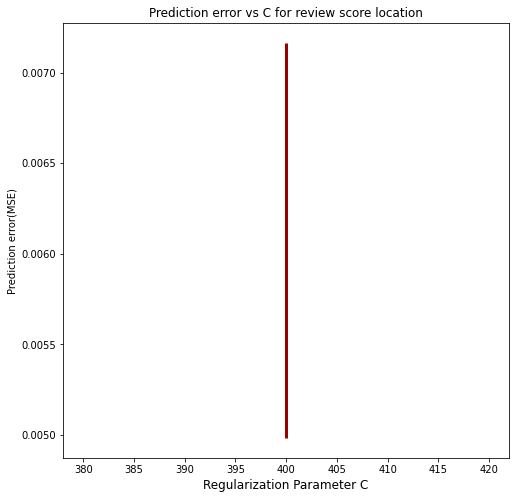

In [79]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(C, mean_error_location , yerr=std_error_location,lw=3,color='#990000')
plt.xlabel("Regularization Parameter C",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs C for review score location")
plt.show()

# Model for values

In [80]:
mean_error_values=[]
std_error_values=[]
for c in C:
    model = Lasso(alpha=1/(2*c))
#     model = LinearRegression()
    mse_arr = []
    for train,test in n_fold.split(X):
        l_model = model.fit(X[train],y_target_values[train])
        y_predict = model.predict(X[test])
#         print("MSE",mean_squared_error(y_target[test],y_predict))
        mse_arr.append(mean_squared_error(y_target_values[test],y_predict))
    mean_error_values.append(np.array(mse_arr).mean())
    std_error_values.append(np.array(mse_arr).std())
        

In [81]:
mean_error_values

[0.0054805053130381805]

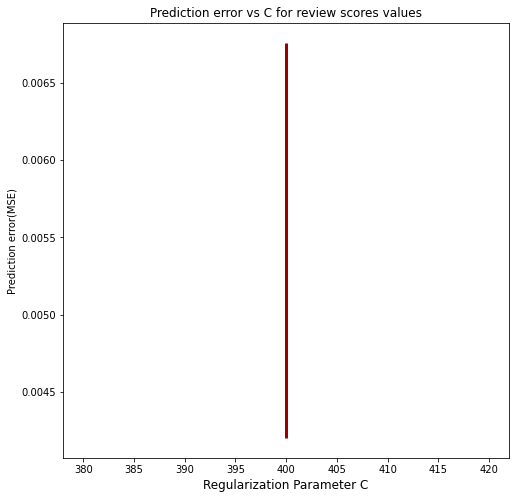

In [82]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(C, mean_error_values, yerr=std_error_values,lw=3,color='#990000')
plt.xlabel("Regularization Parameter C",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs C for review scores values")
plt.show()

# Dummy Regressor for overall rating

In [83]:
y_target_rating = norm_df.iloc[:,[18]].values
y_target_accuracy = norm_df.iloc[:,19].values
y_target_cleanliness = norm_df.iloc[:,20].values
y_target_checkin = norm_df.iloc[:,21].values
y_target_communication = norm_df.iloc[:,22].values
y_target_location = norm_df.iloc[:,23].values
y_target_values = norm_df.iloc[:,[24]].values
X = norm_df.iloc[:, np.r_[0:17, 25:613]].values

In [84]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target_rating, random_state=0)
model = DummyRegressor(strategy='median').fit(X_train,y_train)
y_predict = model.predict(X_test)

mean_error_dummy=[]
std_error_dummy=[]
for c in C:
    model = DummyRegressor(strategy='median')
#     model = LinearRegression()
    mse_arr = []
    for train,test in n_fold.split(X):
        l_model = model.fit(X[train],y_target_rating[train])
        y_predict = model.predict(X[test])
#         print("MSE",mean_squared_error(y_target[test],y_predict))
        mse_arr.append(mean_squared_error(y_target_rating[test],y_predict))
    mean_error_dummy.append(np.array(mse_arr).mean())
    std_error_dummy.append(np.array(mse_arr).std())
        

In [85]:
mean_error_dummy

[0.027055456882851887]

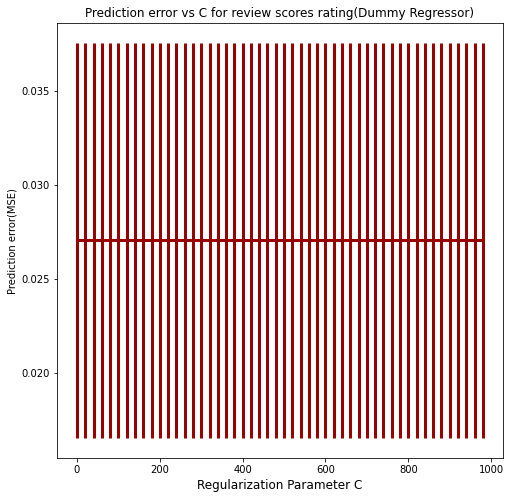

In [60]:
fig, ax = plt.subplots(1, 1,figsize=(8,8))    
plt.errorbar(C, mean_error_dummy, yerr=std_error_dummy,lw=3,color='#990000')
plt.xlabel("Regularization Parameter C",fontsize = 12)
plt.ylabel("Prediction error(MSE)")
plt.title("Prediction error vs C for review scores rating(Dummy Regressor)")
plt.show()

# Dummy regressor for overall accuracy

In [86]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target_accuracy, random_state=0)
model = DummyRegressor(strategy='median').fit(X_train,y_train)
y_predict = model.predict(X_test)

In [87]:
print(mean_squared_error(y_test,y_predict))

0.007198853770982332


# Dummy regressor for overall cleanliness

In [88]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target_cleanliness, random_state=0)
model = DummyRegressor(strategy='median').fit(X_train,y_train)
y_predict = model.predict(X_test)

In [89]:
print(mean_squared_error(y_test,y_predict))

0.012176158388815366


# Dummy regressor for checkin

In [99]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target_checkin, random_state=0)
model = DummyRegressor(strategy='median').fit(X_train,y_train)
y_predict = model.predict(X_test)

In [100]:
print(mean_squared_error(y_test,y_predict))

0.005908533806625675


# Dummy regressor for communicaiton

In [97]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target_communication, random_state=0)
model = DummyRegressor(strategy='median').fit(X_train,y_train)
y_predict = model.predict(X_test)

In [98]:
print(mean_squared_error(y_test,y_predict))

0.0058945538544897995


# Dummy regressor for location

In [93]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target_location, random_state=0)
model = DummyRegressor(strategy='median').fit(X_train,y_train)
y_predict = model.predict(X_test)

In [94]:
print(mean_squared_error(y_test,y_predict))

0.007953388505766731


# Dummy regressor for values

In [101]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target_values, random_state=0)
model = DummyRegressor(strategy='median').fit(X_train,y_train)
y_predict = model.predict(X_test)

In [102]:
print(mean_squared_error(y_test,y_predict))

0.006037562630233833


# Lasso with train,test split for determining coefficient values

In [293]:
from sklearn.model_selection import train_test_split
y_target = norm_df.iloc[:,[18]].values
X = norm_df.iloc[:, np.r_[0:17, 25:1054]].values
X_train, X_test,y_train, y_test = train_test_split(X,y_target,test_size=0.2,shuffle=True)

In [302]:

model = Lasso(alpha=1/(2*100))
model.fit(X_train,y_train)
predict = model.predict(X_test)
print(mean_squared_error(y_test,predict))

0.013588796830204787


In [303]:
columns = (norm_df.iloc[:, np.r_[0:17, 25:1054]].columns)

In [306]:
coef_weight = {}
for i in range(0,len(columns)):
    coef_weight[columns[i]] = l_model.coef_[i]

In [307]:
coef_weight

{'host_response_rate': -0.0,
 'host_acceptance_rate': -0.0,
 'host_is_superhost': 0.0,
 'host_total_listings_count': -0.0,
 'accommodates': 0.0,
 'bedrooms': 0.0,
 'beds': 0.0,
 'price': -0.0,
 'minimum_nights': 0.0,
 'maximum_nights': -0.0004602618851779854,
 'minimum_nights_avg_ntm': 0.0,
 'maximum_nights_avg_ntm': -0.0,
 'has_availability': 0.0,
 'availability_30': 0.0,
 'availability_60': 0.0,
 'availability_90': 0.0,
 'availability_365': 0.0,
 'instant_bookable': -0.0,
 'calculated_host_listings_count': 0.0,
 'calculated_host_listings_count_entire_homes': 0.0,
 'calculated_host_listings_count_private_rooms': -0.0,
 'calculated_host_listings_count_shared_rooms': -0.0,
 'reviews_per_month': 0.0,
 'host_since_days': -0.0,
 'a few days or more': 0.0,
 'within a day': -0.007251989781563879,
 'within a few hours': 0.0,
 'within an hour': 0.0,
 'Dn Laoghaire-Rathdown': 0.0,
 'Dublin City': -0.0,
 'Fingal': 0.0,
 'South Dublin': 0.0,
 'total_host_verifications': 0.0,
 'host_identity_verif